<a id='top'></a>

# CSCI 3022: Intro to Data Science - Summer 2018 Practicum 
***

This practicum is due on Moodle by **11:55 PM on Monday July 23**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your final exam. So, I will be much less helpful than I typically am with homework. For example, I will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is probably because I intend for you to code it up however you want, and only care about the plots/analysis I see at the end. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.  
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on the practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

***

**By writing your name below you agree to abide by the rules given above:**

**Name**: Tanner Bobak

***


**NOTES**: 

- You may not use late days on the practicum nor can you drop your practicum grade. 
- If you have a question for Tony, post it as a **PRIVATE** message on Piazza.  If I decide that the question is appropriate for the entire class I add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)

---

In [26]:
from scipy import stats
import numpy as np 
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

### [25 points] Problem 1: CSCI 3022 goes bowling!

**Part A:** Build a function `bowling_game_simple` to simulate a **simplified version** of a single game of traditional [10-pin bowling](https://en.wikipedia.org/wiki/Ten-pin_bowling). If you are not familiar with bowling, you are encouraged to watch some videos on YouTube. Even better, you can go to the UMC and actually go bowling!

Here is a summary of the simplified rules for the first part of this problem:
* There are 10 frames (like rounds).
* You get 2 rolls in each frame.
* Each frame begins with 10 pins.
* It is possible to knock down zero pins (a "gutter ball" - womp womp).
* Your score for each frame is the total number of pins knocked down by your two rolls.
* If you knock all 10 pins down with your first roll, that is called a "strike" and you do not get a second roll for that frame.
* If you knock all 10 pins down but require both rolls in a frame, that is called a "spare".
* Assume that the probability of knocking down a single pin is a parameter $p$.
    
You should use an appropriate distribution that you have learned to model the knocking down of pins for each roll. In Markdown/MathJax, you must name and fully justify your choice of distribution and other modeling choices. Note that the parameter(s) of this distribution might change, depending on the current sitution (i.e., how many pins are left). Simplifications are okay, as long as you mention and justify them.

---

The simplified bowling situation is best described by a binomial distribution of the form

$$
P_X (k) = \begin{pmatrix} n \\ k \end{pmatrix} p^k (1-p)^{n-k}
$$

where $X$ is a random variable describing the number of pins that are knocked down. $n$ is the total number of pins left. For the first roll, this will always be 10 pins. Subsequent rolls will have less than or equal to this value. $p$ is the probability of knocking down a single pin. Finally, $k$ is the number of pins that are knocked down, implying $P_X (k)$ is the probability of knocking down $k$ pins. $k$ assumes a value from 0 to $n$. 

A binomial distribution is most appropriate to describe this situation because we are interested in modeling the number of pins that are knocked down ("successes") out of the total number of pins ("trials"). This model does ignore some very major features of the game, however. First, the trajectory of the ball would obviously impact the probability of some pins being knocked down relative to the others. Next, each pin being knocked down is not truly independent from the others. One pin falling can affect the outcome of the others falling. Additionally, it is not totally reasonable to assume that $p$ is an unchanging parameter. For example, the probability of knocking down a pin on the first throw is far different than if the pins were in a split configuration. 

Despite these drawbacks, the binomial distribution should reasonably approximate this simplified game of bowling, especially for the first throw of a frame where the pin configuration would always be the same.

In [166]:
def bowling_game_simple(p, frames=10, rolls_per_frame=2, pin_number=10):

    score = 0
    for frame in range(0,frames):
        pins = pin_number
        for roll in range(0,rolls_per_frame):
            hits = stats.binom.rvs(pins, p)
            pins -= hits
            if hits == pin_number: 
                break
        score += (pin_number - pins)
    
    return score


some_games = [bowling_game_simple(0.8) for _ in range(0,10)]
print(some_games)

[99, 95, 99, 96, 95, 97, 95, 95, 95, 95]


---

**Part B:** Simulate 1,000 games of bowling with $p=0.5$ and plot a density histogram of the resulting total scores. Be sure to label your axes.

What is the empirical expected value of total score from your simulations? Explain fully why this does or does not match what you would expect.

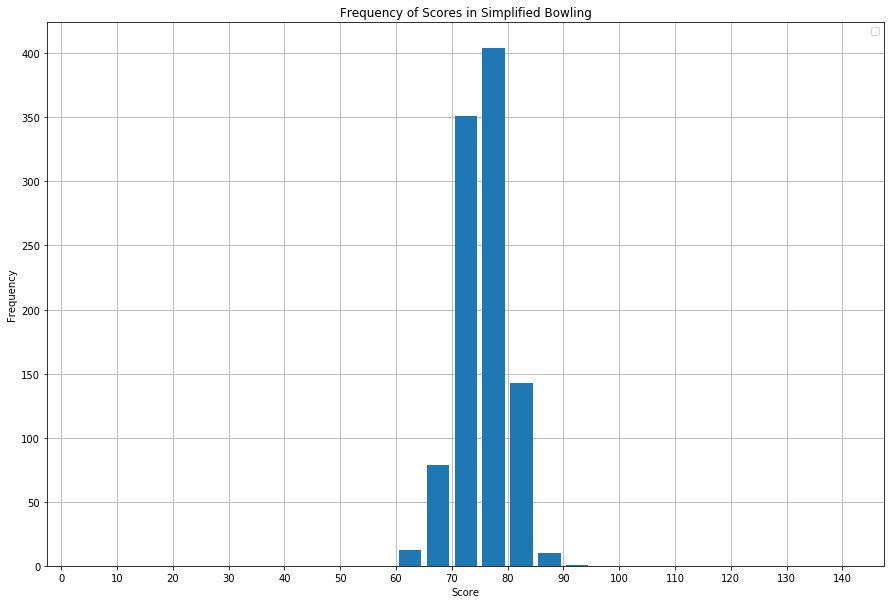

In [167]:
# Borrow my super duper histogram plotter from HWMK06
def tanner_flavored_histogram(data_arr, lower, upper, bin_width, density=True, fwidth=1, \
                              legend_labels=(), xlabel='x', ylabel='Frequency', title='Histogram', \
                              tick_skip=1, dtype='float'):
    """
    I really don't like the default histogram plotting so I made a better version.
    
    data_arr: vector of data sets you wish to plot.
    lower: lower bound to plot
    upper: upper bound to plot
    bin_width: width of each bin
    density: make it a density plot or nah
    fwidth: width that the bars take up within a bin
    legend_labels: legend bits
    
    The rest is self explanatory
    
    """
    plt.figure(figsize=(15,10))
    n_bins = int((upper-lower)/bin_width)
    
    nelem = np.shape(data_arr)[0]
    for elem in range(0, nelem):
        data = data_arr[elem]
        hist, edges = np.histogram(data, bins=n_bins, range=(lower,upper))
        histd = hist
        if density:
            histd = hist/np.sum(hist)
            
        left_edges = edges[:(len(edges)-1)]
        filled_width = bin_width * fwidth
        individual_width = filled_width/nelem
        bins = left_edges + (bin_width-filled_width/2) + individual_width*elem
        
        plt.bar(bins, histd, width=individual_width, align='edge')
        
    plt.legend(legend_labels)
    plt.grid()
    plt.gca().set_axisbelow(True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks((edges+bin_width/2)[::tick_skip], (edges.astype(dtype).astype('str'))[::tick_skip])
    plt.xlim((lower,upper))
    plt.show();
    
    
# Perform Simulations
n_sims = 1000
sim_games = [bowling_game_simple(0.5) for _ in range(0,n_sims)]
tanner_flavored_histogram([sim_games], 0, 150, 5, density=False, fwidth=0.8, \
                          xlabel='Score', ylabel='Frequency',  \
                          title='Frequency of Scores in Simplified Bowling', tick_skip=2, dtype='int')

In [98]:
# Find the empirical mean
print("Empirical expected value of simplified bowling: {:0.3f} points".format(np.mean(sim_games)))

Empirical expected value of simplified bowling: 75.053 points


Empirically, the expected score for a simplified bowling game is about 75 points. This value is reasonable because the expected value of a binomial distribution is $np$. For the parameters given, this evaluates to 5 points for the first frame of each game.  For the second roll, there would only be about $p$ times as many pins as the first roll. For the given value of $p=0.5$, this means there are only 5 pins left to knock down, and it would be expected that half of those would be knocked down. Therefore, about 7.5 pins are knocked over each frame. Taken across all ten frames, this means that it should be expected that 75 points should be scored, which is what was observed.

---

**Part C:** Build a function `bowling_game` to simulate a more realistic version of a single game of traditional [10-pin bowling](https://en.wikipedia.org/wiki/Ten-pin_bowling).  Here are the additional [rules](https://en.wikipedia.org/wiki/Ten-pin_bowling#Rules_of_play) to add:
* *Generally*, your score for each frame is the total number of pins knocked down by your two rolls.
* If you get a strike, then:
    * you do not get a second roll for that frame, and
    * your score for that frame is the 10 from what you just knocked down _plus_ the total number of pins you knock down on your next 2 rolls.
* If you get a spare, then your score for that frame is the 10 from what you just knocked down _plus_ the number of pins you knock down on your next roll.
* The tenth frame has a few of special rules too:
    * If you get a strike on your first roll, then you are awarded two extra rolls.
    * If you get a spare on your second roll, then you are awarded one extra roll.
    * Your score for the tenth frame is simply the total number of pins knocked down.
    
An example bowling game and the total score will be provided in a "Practicum Q&A" Piazza post.

In [76]:
def get_pins(shot_type, idx, pin_number=10):
    if shot_type[idx] == -2 or shot_type[idx] == -1:
        return pin_number
    elif shot_type[idx] >= 0:
        return shot_type[idx]
    elif shot_type[idx] == -3:
        return get_pins(shot_type, idx+1, pin_number)
    else:
        return 0


def print_game(shot_type, scores=None, rolls_per_frame=2, num_pad=3):
    frastr = "Frame #:        |"
    outstr = "Shot Outcome:   |"
    scostr = "Score:          |"
    if scores is None:
        scostr = ""
    frame_padding = (num_pad+2)*rolls_per_frame - 2
    for roll in range(0,len(shot_type)):
        if shot_type[roll] > 0:
            outstr += (" {:^" + str(num_pad) + "d} ").format(int(shot_type[roll]))
        elif shot_type[roll] == 0:
            outstr += ("{:^" + str(num_pad+2) + "s}").format("-")
        elif shot_type[roll] == -1:
            outstr += ("{:^" + str(num_pad+2) + "s}").format("/")
        elif shot_type[roll] == -2:
            outstr += ("{:^" + str(num_pad+2) + "s}").format("X")
        elif shot_type[roll] == -3:
            outstr += " " * (num_pad+2)
        
        last_frame = (roll > len(shot_type)-(rolls_per_frame+1))
        if (roll+1) % rolls_per_frame == 0 and not last_frame:
            frastr += (" {:^" + str(frame_padding) + "d} |").format(int(1 + roll // rolls_per_frame))
            outstr += "|"
            if scores is not None:
                scostr += (" {:^" + str(frame_padding) + "d} |").format(int(np.sum(scores[:((roll // rolls_per_frame)+1)])))
        elif (roll+1) % rolls_per_frame == 0 and last_frame:
            frastr += (" {:^" + str(frame_padding+5) + "d} ").format(int(1 + roll // rolls_per_frame))
            if scores is not None:
                scostr += (" {:^" + str(frame_padding+5) + "d} ").format(int(np.sum(scores)))
    
    print('_' * (len(outstr)-1))
    print(frastr)
    print('-' * (len(outstr)-1))
    print(outstr)
    if scores is not None:
        print('-' * (len(outstr)-1))
        print(scostr)
    print('\u203e' * (len(outstr)-1))

    
def bowling_game(p, frames=10, rolls_per_frame=2, pin_number=10, print_results=False):

    """
    This isn't your average everyday bowling. This is...
    
    ~*~ A D V A N C E D   B O W L I N G ~*~
    
    Has advanced support for any number of frames, pins, and any number of rolls per frame
    greater than 1. Also can be configured to print formatted results of the game containing
    the frame number, outcome of a roll, and running score.
    
    Arguments:
    p: Probability of knocking down a single pin. Binomial distribution simulates probability
       of knocking down different numbers of pins.
    frames: Number of frames.
    rolls_per_frame: Times the "ball is rolled" during each frame. Must be >= 2
    pin_number: Total pins that can be knocked over.
    print_results: Should the game's outcome be printed in a formatted block?
    
    Returns:
    score: Total game score.
    """
    
    assert rolls_per_frame > 1, "Need at least 2 rolls per frame."
    assert frames > 0, "Frames must be positive."
    assert pin_number > 0, "Pins must be positive."
    
    total_rolls = frames*rolls_per_frame+1
    shot_type = np.zeros(total_rolls) # Track shot type, 0-9 is normal, -1 is spare, -2 is strike, -3 is no roll (after strike)
    scores = np.zeros(frames)
    
    frame = 0
    while frame < frames:
        pins = pin_number
        last_frame = (frame == frames-1)
        rolls_this_frame = rolls_per_frame if not last_frame else (rolls_per_frame + 1)
        for roll in range(0,rolls_this_frame):
            roll_idx = frame*rolls_per_frame + roll
            next_frame_idx = (frame+1)*rolls_per_frame
            hits = stats.binom.rvs(pins, p)
            pins -= hits
            if pins == 0:
                if not last_frame:
                    if roll == 0: # Strike
                        shot_type[roll_idx] = -2
                        shot_type[(roll_idx+1):(next_frame_idx+1)] = -3
                    else: # Spare
                        shot_type[roll_idx] = -1
                        if roll_idx + 1 <= next_frame_idx:
                            shot_type[(roll_idx+1):(next_frame_idx+1)] = -3
                    break
                else:
                    if hits == pin_number: # Strike
                        shot_type[roll_idx] = -2
                    else: # Spare
                        shot_type[roll_idx] = -1
                    pins = pin_number  
            else: # Normal
                shot_type[roll_idx] = hits
                if last_frame and not shot_type[roll_idx-1] == -2 and roll == (rolls_per_frame-1):
                    break
                
        frame += 1
        
    # Calculate score
    for frame in range(0, frames):
        score = 0
        last_frame = (frame == frames-1)
        rolls_this_frame = rolls_per_frame if not last_frame else (rolls_per_frame + 1)
        for roll in range(0,rolls_this_frame):
            roll_idx = frame*rolls_per_frame + roll
            stype = shot_type[roll_idx]
            if not last_frame:
                if stype == -2: # strike
                    score = pin_number + get_pins(shot_type, roll_idx+1, pin_number) + \
                            get_pins(shot_type, roll_idx+2, pin_number)
                    break
                elif stype == -1: # spare
                    score += (pin_number - get_pins(shot_type, roll_idx-1, pin_number)) + \
                             get_pins(shot_type, roll_idx+1, pin_number)
                    break
                elif stype >= 0: # other
                    score += shot_type[roll_idx]
            else:
                if stype == -2: # strike
                    score += pin_number
                elif stype == -1: # spare
                    score += (pin_number - get_pins(shot_type, roll_idx-1, pin_number))
                elif stype >= 0: # other
                    score += shot_type[roll_idx]
        scores[frame] = score
        
    if print_results:  
        print_game(shot_type, scores=scores, rolls_per_frame=rolls_per_frame, num_pad=2)
    
    return np.sum(scores)


bowling_game(0.8, print_results=True);

_____________________________________________________________________________________________________________
Frame #:        |   1    |   2    |   3    |   4    |   5    |   6    |   7    |   8    |   9    |     10      
-------------------------------------------------------------------------------------------------------------
Shot Outcome:   | 8   /  | 8   /  | 9   /  | X      | 9   /  | 8   /  | 9   /  | 6   1  | 7   2  | 8   /   7  
-------------------------------------------------------------------------------------------------------------
Score:          |   18   |   37   |   57   |   85   |  103   |  122   |  138   |  145   |  154   |     171     
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾


**Part D:** Use your `bowling_game` function to simulate 1,000 games of more realistic bowling with $p=0.5$. Plot a density histogram of the scores. Compare the distributions with and without the strike, spare and tenth frame bonuses using concepts from this class. That is, compare your results from Part B with the results here. Write a few sentences commenting on any key differences you see.

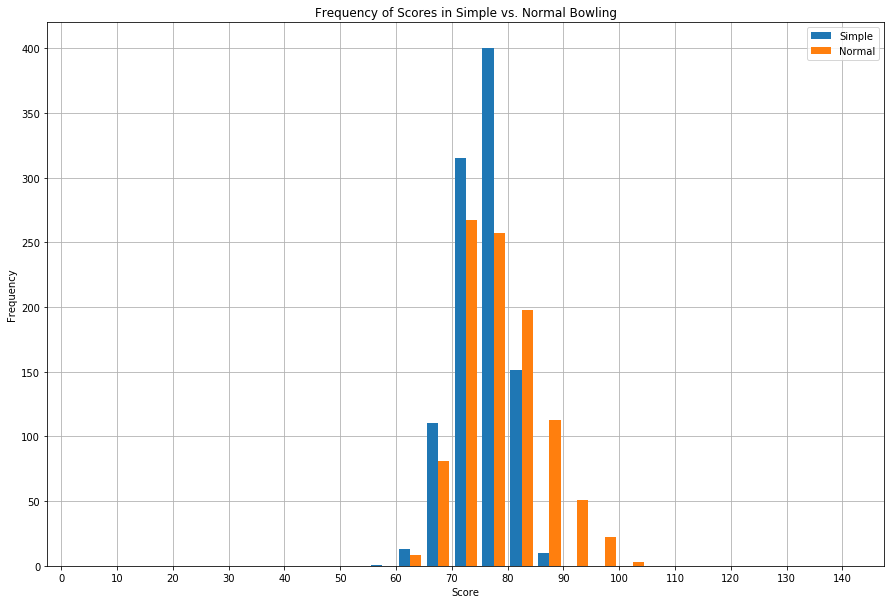

In [100]:
# Perform Simulations
n_sims = 1000
sim_games_normal = [bowling_game(0.5) for _ in range(0,n_sims)]
tanner_flavored_histogram([sim_games,sim_games_normal], 0, 150, 5, density=False, fwidth=0.8, \
                          xlabel='Score', ylabel='Frequency', legend_labels=("Simple","Normal"), \
                          title='Frequency of Scores in Simple vs. Normal Bowling', tick_skip=2, dtype='int')

In [113]:
# Find some stats
print("Empirical expected value of simple bowling: {:0.3f} points".format(np.mean(sim_games)))
print("Empirical expected value of normal bowling: {:0.3f} points".format(np.mean(sim_games_normal)))

print("Empirical variance of simple bowling: {:0.3f} points".format(np.var(sim_games, ddof=1)))
print("Empirical variance of normal bowling: {:0.3f} points".format(np.var(sim_games_normal, ddof=1)))

Empirical expected value of simple bowling: 75.053 points
Empirical expected value of normal bowling: 78.112 points
Empirical variance of simple bowling: 20.355 points
Empirical variance of normal bowling: 52.764 points


As seen in the histogram above, the distribution of scores of a normal bowling game that accounts for the effects of strikes, spares, and a tenth frame is shifted slightly from the simplified model of the bowling game. Notably, the normal game's distribution has a slightly higher mean, a higher variance, and is positively skewed relative to the approximately symmetric distribution of the simplified game. In addition, there are some scores in the normal bowling distribution that exceed 100 points. Scores above 100 would be impossible in the simplified bowling game because the simplified bowling has no strikes, spares, or final frame effects. It is also because of these effects that the mean is pulled higher. 

---

**Part E:** Compare the effects of the strike, spare and 10th frame bonuses for a better bowler, with $p=0.75$. Include any new simulations, figures and/or statistics that you think are relevant. Write a few sentences to comment on any differences you notice.

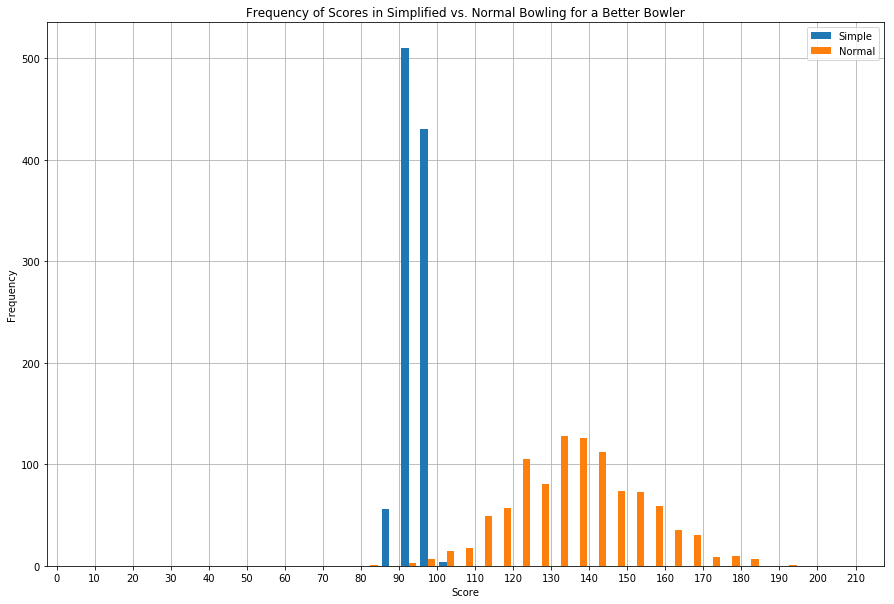

In [115]:
# Simulate 1,000 games for both the simple bowling and normal bowling.
n_sims = 1000
p = 0.75
better_sim_games = [bowling_game_simple(p) for _ in range(0,n_sims)]
better_sim_games_normal = [bowling_game(p) for _ in range(0,n_sims)]
tanner_flavored_histogram([better_sim_games,better_sim_games_normal], 0, 220, 5, density=False, fwidth=0.8, \
                          xlabel='Score', ylabel='Frequency', legend_labels=("Simple","Normal"), \
                          title='Frequency of Scores in Simplified vs. Normal Bowling for a Better Bowler', \
                          tick_skip=2, dtype='int')

In [116]:
# Find some stats
print("Empirical expected value of simple bowling: {:0.3f} points".format(np.mean(better_sim_games)))
print("Empirical expected value of normal bowling: {:0.3f} points".format(np.mean(better_sim_games_normal)))

print("Empirical variance of simple bowling: {:0.3f} points".format(np.var(better_sim_games, ddof=1)))
print("Empirical variance of normal bowling: {:0.3f} points".format(np.var(better_sim_games_normal, ddof=1)))

Empirical expected value of simple bowling: 93.901 points
Empirical expected value of normal bowling: 136.457 points
Empirical variance of simple bowling: 5.981 points
Empirical variance of normal bowling: 285.560 points


With a better bowler, the effects of strikes, spares, and the tenth frame are much more exaggerated. There are a few key obeservations that can be made.

First, the maximum score that can be achieved in the simplified model is observed. No scores over 100 are found in the simple model, and the small blue bar that appears greater than 100 in the above histogram is an merely an artifact that bins are inclusive on the lower end and exclusive on the upper end. The value 100 is therefore included in the bin over the interval $[100,105)$. 

Next, the spread of the scores in the normal game is much more evident. The variance of the scores in the normal game is 50 to 60 times that of the simplified game.

Finally, the mean score for the normal bowling game is significantly higher than for a simple bowling game when a better bowler is playing.

<br>

---
[Back to top](#top)
<a id='p2'></a>

### [25 points] Problem 2: Absenteeism at work

The data set [`Absenteeism_at_work.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jjd2ujdkm674tf) (linked here, and on Piazza) examines a variety of factors surrounding employees at a courier in Brazil between 2007 and 2010. The data include characteristics of the employees like education, age, number of children and pets, and so on, as well as the amount of time absent from work (hours) each occurrence. A file describing the data set is available from the UC Irvine repository, as well as [linked on Piazza](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jjd2uj0fzds4t9) under Resources, alongside the data set.

---

**Part A**:  Load the data set `Absenteeism_at_work.csv` as a Pandas data frame and use Pandas rename all of the columns to concise, descriptive, single-word column titles. Use Pandas built-in methods to display the first few rows and the column titles of your new and improved data frame.

In [2]:
df = pd.read_csv("https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jjd2ujdkm674tf", sep=';')
df.columns = ["ID", "Reason", "Month", "Day", "Season", "Trans_$", "Distance", "Service", "Age", "Workload", "Target", \
              "Discipline", "Education", "Son", "Drink", "Smoke", "Pet", "Weight", "Height", "BMI", "Absent"]
df.head()

,ID,Reason,Month,Day,Season,Trans_$,Distance,Service,Age,Workload,...,Discipline,Education,Son,Drink,Smoke,Pet,Weight,Height,BMI,Absent
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


---

**Part B**: Is any one day of the week more/less likely for employees to be absent at work on that day? Fully justify your response using statistical techniques from this class.

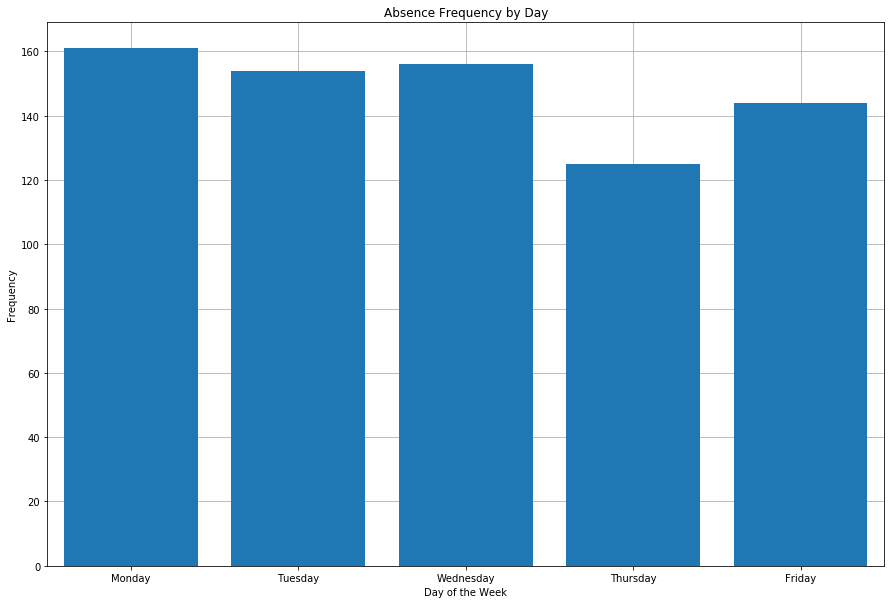

In [3]:
ax = df.hist(column="Day", bins=5, rwidth=0.8, figsize=(15,10))[0,0];
ax.set_title("Absence Frequency by Day");
ax.set_ylabel("Frequency");
ax.set_xlabel("Day of the Week");
ax.set_axisbelow(True)
ax.set_xticks(np.linspace(2,6,6) + 0.4);
ax.set_xlim(2,6);
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]);

This histogram is a little misleading because there is almost a 40 absence difference between Monday and Thursday, but it is a good starting point. It looks like Thursday may have a lower absence rate upon first inspection.

Ultimately, it is desired to determine if the absence rate for any one day is significantly different from the average absence rate. In other words, is the proportion of absences on one day different from the mean proportion of absences?

To test this, the the null and alternative hypotheses are formalized like so.

$$
H_0 : \, p_i = p \\
H_1 : \, p_i \neq p
$$

where $p_i$ is the proportion of weekly absences that happen on a given day and $p$ is the expected proportion absences on a given day. Here, $p=0.2$ because there are five days of the work week and $1/5 = 0.2$. 

Finally, a two tailed p-test at the $\alpha=0.05$ significance level to determine if any given day has a significantly lower or higher absence rate. Five total tests will need to be performed, one for each day. Calculations are below.

In [24]:
alpha = 0.05
p = 0.2

n = len(df)

for day in range(2,7):
    pi = len(df[df["Day"] == day])/n
    z = (pi - p)/np.sqrt((p*(1-p))/(n))
    pval = 2*stats.norm.cdf(-np.abs(z))
    
    print("Day {0:d}: Absence Proportion={1:0.4f}, Z={2:0.4f}, p-value={3:0.4f}. Reject Null: {4}".format(day, pi, z, pval, pval<alpha))

Day 2: Absence Proportion=0.2176, Z=1.1947, p-value=0.2322. Reject Null: False
Day 3: Absence Proportion=0.2081, Z=0.5514, p-value=0.5814. Reject Null: False
Day 4: Absence Proportion=0.2108, Z=0.7352, p-value=0.4622. Reject Null: False
Day 5: Absence Proportion=0.1689, Z=-2.1137, p-value=0.0345. Reject Null: True
Day 6: Absence Proportion=0.1946, Z=-0.3676, p-value=0.7132. Reject Null: False


It can be seen that the p-value for the proportion of absences is only less than $\alpha$ on Thursdays (day=5). Therefore, the null hypothesis can only be rejected for Thursdays, and we can conclude that at the $\alpha=0.05$ significance level the rate of absenteeism on Thursdays is significantly different than the expected rate of absenteeism.

---

**Part C**: How many distinct employees are represented in the data set? Show in Python how you calculated this (opening and counting in Excel or a text editor is not an option).

The number of distinct employees can be calculated by determining the number of unique IDs in the "ID" column of the data frame. This calculation is done with the Pandas `unique` method.

In [7]:
n_unique_employees = len(df["ID"].unique())
print("{} unique employees.".format(n_unique_employees))

36 unique employees.


As seen above, the data set contains 36 unique employees, as counted by the number of unique employee ID numbers.

---
**Part D**: Create a new data frame with only one row corresponding to each employee. Include the original employee ID, as well as these columns, that we might want to investigate further:
* total number of absences
* total time of absences
* distance to work
* age
* number of children
* whether they are a social drinker
* whether they are a social smoker
* number of pets

In [48]:
group = df.groupby('ID').size().reset_index(name='Absences');
#absence_count = group.size()
#absence_time = group['Absent'].agg(['sum'])
print(group)

    ID  Absences
0    1        23
1    2         6
2    3       113
3    4         1
4    5        19
5    6         8
6    7         6
7    8         2
8    9         8
9   10        24
10  11        40
11  12         7
12  13        15
13  14        29
14  15        37
15  16         2
16  17        20
17  18        16
18  19         3
19  20        42
20  21         3
21  22        46
22  23         8
23  24        30
24  25        10
25  26         5
26  27         7
27  28        76
28  29         5
29  30         7
30  31         3
31  32         5
32  33        24
33  34        55
34  35         1
35  36        34


---
**Part E:**  One might hypothesize that employees with pets would be absent from work more often than employees without pets. Use an appropriate statistical technique to obtain 95% confidence interval for the difference in mean total time absent for the employees with pets and those without pets. What can you conclude?

<br>

---
[Back to top](#top)
<a id='p3'></a>

### [30 points] Problem 3: Sharknado Prediction

Governor Hickenlooper has charged you with the task of assessing the factors associated with sharknado risk in Colorado. As everyone knows, sharknadoes are a leading cause of sharknado-related illness, and you are a world-renowned data/shark scientist.

You decide to use multiple linear regression to understand and predict what factors lead to increased sharknado hazard. Your lead scientist, aptly named Fin, has collected lots of relevant data at a local sharknado hotspot, the Boulder Reservoir[\*](#footnote). The data cover a variety of sharknado-related environmental and other conditions, and you'll find this data in the file [`sharknadoes.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jjd2uiqgi2l4t6) (linked here, and on Piazza). 

**Response**: 

- $\texttt{sharknado hazard}$: the hazard of a sharknado, where 1 is very unlikely and 100 is highly likely

**Features**: 

- $\texttt{temperature}$: the outside temperature, measured in degrees Fahrenheit
- $\texttt{clouds}$: what percentage of the sky was covered by clouds (fraction, 0-1)
- $\texttt{humidity}$: relative humidity (percent, 0-100)
- $\texttt{pressure}$: local air pressure (millibar)
- $\texttt{earthquake}$: the intensity of the most recent earthquake measured in the continental United States
- $\texttt{taunts}$: the number of times over the past year that someone has taunted a shark
- $\texttt{ice cream sold}$: the number of units of ice cream sold at the beach concession stand 
- $\texttt{shark attacks}$: the number of shark attacks on the day of observation

---
**Part A**: Read the data from `sharknadoes.csv` into a Pandas DataFrame.  Note that since we will be doing a multiple linear regression we will need all of the features, so you should drop any row in the DataFrame that is missing data. 

In [27]:
dfS = pd.read_csv("https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jjd2uiqgi2l4t6")
print("Number of rows of data before cleaning: {}".format(len(dfS)))
dfS = dfS.dropna()
print("Number of rows of data after cleaning: {}".format(len(dfS)))
dfS.head()

Number of rows of data before cleaning: 85
Number of rows of data after cleaning: 85


,temperature,clouds,humidity,pressure,earthquake,taunts,shark attacks,ice cream sold,sharknado hazard
0,78.0,1.00,86.41,847.12,7.1,15.0,2.0,273.0,40.22
1,89.0,1.00,96.67,844.34,7.4,20.0,4.0,184.0,36.42
2,65.0,1.00,53.85,839.48,7.0,0.0,9.0,141.0,19.54
3,36.0,0.13,88.72,851.28,7.9,34.0,2.0,146.0,85.00
4,72.0,1.00,63.08,852.67,7.5,6.0,2.0,178.0,56.34


There are no rows in the data frame that are missing data.

---

**Part B**: Perform the appropriate statistical test at the $\alpha = 0.01$ significance level to determine if _at least one_ of the features is related to the the response $y$.  Clearly describe your methodology and show all computations in Python. 

An F-test is appropriate to determine if at least one of the features is related to the response, $y$. The null hypothesis is that no features are important and the alternative hypothesis is that at least one of the features is important to the response. First, a multiple feature model and its response is constructed for the data. The data is also summarized with the StatsModels OLS summary feature to find the value of the F-statistic.

In [125]:
x = dfS.iloc[:,:-1]
y = dfS["sharknado hazard"]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

sse_full = model.mse_resid*model.df_resid # Used later

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       sharknado hazard   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     347.2
Date:                Mon, 23 Jul 2018   Prob (F-statistic):           1.44e-56
Time:                        17:26:22   Log-Likelihood:                -209.89
No. Observations:                  85   AIC:                             437.8
Df Residuals:                      76   BIC:                             459.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2547.5254     59.894    -42.534      0.000   -2666.815   -2428.236
temperature       -0.4415      0.046     -9.598      0.000      -0.533      -0.350
clouds            -0.2182      2.356     -0.093      0.926      -4.911       4.475
humidity           0.0134      0.023      0.581      0.563      -0.033       0.060
pressure           3.0696      0.071     43.021      0.000       2.927       3.212
earthquake         2.2193      0.419      5.292      0.000       1.384       3.055
taunts             0.3091      0.036      8.533      0.000       0.237       0.381
shark attacks     -0.0336      0.136     -0.247      0.806      -0.305       0.237
ice cream sold     0.0068      0.007      0.972      0.334      -0.007       0.021
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.162
Skew:                           0.093   Prob(JB):                        0.922
Kurtosis:                       3.105   Cond. No.                     1.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above, we see that $F = 347.2$. Already, this is a strong indication that at least one feature is important since it is so much larger than 1. To verify, we find the critical value of the F-statistic at the $\alpha=0.01$ significance level using `stats.f.ppf`. 

In [42]:
alpha = 0.01
p = model.df_model # number of features
n = model.nobs # number of observations
f_crit = stats.f.ppf(1-alpha, p, n-p-1)
print("Critical F-Statistic: {:0.4f}".format(f_crit))

Critical F-Statistic: 2.7547


Clearly, $F = 347.2 \gg 2.7547 = F_{\alpha,\, p,\, n-p-1}$. So, the null hypothesis that none of the features of the model are important is rejected in favor of the alternative hypothesis that at least one feature is important.

---

**Part C**: 

*First,* write a function `forward_select(df, resp_str, maxk)` that takes in the DataFrame, the name of the column corresponding to the response, and the maximum number of desired features, and returns a list of feature names corresponding to the `maxk` most important features via forward selection.  At each stage in forward selection you should add the feature whose inclusion in the model would result in the lowest sum of squared errors $(SSE)$.

*Second,* use your function to determine the best $k=4$ features to include in the model. Clearly indicate which feature was added in each stage. 

**Note**: The point of this exercise is to see if you can implement **foward_select** yourself.  You may of course use canned routines like statmodels OLS, but you may not call any Python method that explicitly performs forward selection.

In [130]:
def forward_select(df, resp_str, maxk):
    """
    Perform forward selection to determine the best maxk features
    in df to model the response indicated by resp_str.
    """
    
    # List all of the columns in the data frame and remove the 
    # response variable.
    all_features = list(df)
    all_features.remove(resp_str)
    
    # List that will store the best features
    features = []
    
    # Iterate maxk times
    for _ in range(0,maxk):
        
        # Get the number of features remaining that could be added.
        p = len(all_features)
        
        # Array to store SSE values.
        sse_values = np.zeros(p)
        
        # Iterate through all the features that could be added.
        for pi in range(0, p):
            
            # Create model based on features that have already
            # been added, plus the current feature of interest.
            key_features = features + [all_features[pi]]
            x = dfS.loc[:, key_features]
            y = dfS.loc[:, resp_str]
            x = sm.add_constant(x)
            
            # Fit the model
            model = sm.OLS(y,x).fit()
            
            # Save the SSE of the model
            # Also documentation is trash this looks like it 
            # it should be SSR but it is actually SSE.
            sse_values[pi] = model.mse_resid
            
        # Get the index of the minimum SSE for the features
        # that were added this step.
        min_sse_idx = np.argmin(sse_values)
        
        # Get the name of the best feature this step.
        best_feature = all_features[min_sse_idx]
        
        # Add the best feature to the list that saves the best
        # features, and remove it from the list of features that
        # still could be added.
        features.append(best_feature)
        all_features.remove(best_feature)
    
    # Return the list of best features.
    return features
  

params = forward_select(dfS, 'sharknado hazard', 4)
print(params)

['pressure', 'temperature', 'taunts', 'earthquake']


The best four features to include in the model are pressure in millibars, temperature in Fahrenheit, number of shark taunts, and magnitude of the most recent earthquake. Pressure was the first feature added, then temperature, followed by the number of taunts, and finally the magnitude of the most recent earthquake.

---

**Part D**: Write down the multiple linear regression model, including estimated parameters, obtained by your forward selection process. 

In [134]:
# Create the model with my parameters
x = dfS.loc[:, params]
y = dfS.loc[:, 'sharknado hazard']
x = sm.add_constant(x)

model_red = sm.OLS(y, x).fit()

sse_red = model_red.mse_resid*model_red.df_resid # Used later

model_red.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       sharknado hazard   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     718.1
Date:                Mon, 23 Jul 2018   Prob (F-statistic):           8.30e-62
Time:                        17:39:05   Log-Likelihood:                -210.63
No. Observations:                  85   AIC:                             431.3
Df Residuals:                      80   BIC:                             443.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2557.1602     56.465    -45.287      0.000   -2669.530   -2444.791
pressure        3.0831      0.067     45.938      0.000       2.949       3.217
temperature    -0.4236      0.019    -21.878      0.000      -0.462      -0.385
taunts          0.3151      0.033      9.406      0.000       0.248       0.382
earthquake      2.0640      0.386      5.347      0.000       1.296       2.832
==============================================================================
Omnibus:                        0.955   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                0.727
Skew:                           0.226   Prob(JB):                        0.695
Kurtosis:                       3.010   Cond. No.                     1.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model obtained by forward selection that minimizes the sum of squared errors is 

$$
y = -2557.1602 + 3.0831 \times x_1 - 0.4236 \times x_2 + 0.3151 \times x_3 + 2.0604 \times x_4
$$

where $x_1$ through $x_4$ correspond to pressure, temperature, taunts, and earthquake magnitude, respectively.

---

**Part E**: Perform the appropriate statistical test at the $\alpha = 0.01$ significance level to determine whether there is a statistically significant difference between the full model with all features and the reduced model obtained by forward selection in **Part D**. 

Again, an F-test is appropriate to test if there is a statistically significant difference between the two models. Here, the null hypothesis is that the full and reduced model are no different. The alternative hypothesis is then that the full model and reduced model are different, that is one fits the data better than the other. First, the SSE for the full model and reduced model are recovered from Part B and Part D. These values are passed into the formula for the F-statistic that compares two multivariate models:

$$
F = \frac{(SSE_{reduced} - SSE_{full}) / (p-k)}{SSE_{full} / (n-p-1)}
$$

where $p = 8$, the number of features in the full model and $k=4$, the number of features in the reduced model.

In [180]:
n = len(dfS)
p = 8
k = 4
alpha = 0.01
f = ((sse_red - sse_full)/(p-k))/(sse_full/(n-p-1)) # sse_red and sse_full from previous parts
f_crit = stats.f.ppf(1-alpha, p, n-p-1)
print("F-Test Results: F={0:0.4f}, Critical F={1:0.4f}, Reject Null? {2}".format(f, f_crit, f>f_crit))

F-Test Results: F=0.3324, Critical F=2.7547, Reject Null? False


Because the test F-statistic is not greater than the critical F-statistic, we fail to reject the null hypothesis that the models are different at the $\alpha=0.01$ significance level. This is good news because it means there is evidence that the reduced model is just as effective as the full model. 

---

**Part F**: Based on your conclusions in **Part E**, use the _better_ of the two models to predict the sharknado hazard when the following features are observed: 

- $\texttt{temperature}$: 67 degrees F
- $\texttt{clouds}$: 0.8
- $\texttt{humidity}$: 83
- $\texttt{pressure}$: 850 millibar 
- $\texttt{earthquake}$: 7
- $\texttt{taunts}$: 47
- $\texttt{shark attacks}$: 11
- $\texttt{ice cream sold}$: 120

Here the reduced model will be used because in Part E it was shown via an F-test that there is no significant difference between the full and reduced model. Generally, it is better to fit with fewer features rather than more, so it motivates the use of the reduced model.

To predict the sharknado hazard with these parameters, the given values are simply applied to the equation in Part D.

In [138]:
temp = 67
press = 850
taunts = 47
earthquake = 7

c = model_red.params

hazard = c[0] + c[1]*press + c[2]*temp + c[3]*taunts + c[4]*earthquake

print("Sharknado Hazard: {:0.4f}".format(hazard))

Sharknado Hazard: 64.3105


The sharknado hazard with these parameters is about 64.3. It might be wise to take shelter (or grab a chainsaw whatever floats your boat).

<br>

---
[Back to top](#top)
<a id='p4'></a>

### [20 points] Problem 4:  Dealer's Choice

For this problem, you may use a data set of your choosing. It must **not** be a data set used for any of the in-class notebooks, homework problem sets, or used in the rest of this practicum. 

---

**Part A:** 

1. Give a few sentences summarizing your data set. Provide a few details about where you found it, when it was collected, who/what the sample population was, and what the key quantities of interest are.
2. Also provide a hyperlink **and citation** to any relevant scientific paper. Most data sets include a "cite this work as" suggestion.
3. Then, clearly state a research question that you would like to answer using the data set.  For example, "Is a random bottle of red or white wine more likely to have a quality of 5 or higher?"

My data set is a 2002 study by the National Sleep Foundation of over 1,000 responses to questions about sleep quality and duration. It lists respondents answers to [`this survey`](https://sleepfoundation.org/sites/default/files/SIAQuestionnaire2002.pdf). I found this by using Google to find data sets related to sleep duration, which directed me to here: [`https://sleepresearchsociety.org/career-education/public-datasets/`](https://sleepresearchsociety.org/career-education/public-datasets/). From this link I found the study to be examined here. The sample population in this case is Americans age 18 and over. My quantities of interest are Question 3 and Question 6, which address sleep duration on weekdays and on the weekends.

The scientific summary of this data set can be found [`here`](https://sleepfoundation.org/sites/default/files/2002SleepInAmericaPoll.pdf): It has the following citation.

2002 Sleep in America Poll – Adult Sleep Habits
Sleep Health: Journal of the National Sleep Foundation, Volume 1, Issue 2, e1

The question I wish to answer with this data set is do Americans over age 18 sleep for a longer duration during weekdays or the weekend, on average?

---

**Part B:** Read in data set, and perform any cleaning that is necessary. Write a sentence or two to describe any fill-values or missing data and how you dealt with them. If the data set is fine as-is, just say so and thank your lucky stars somebody else took the time to clean it.

I read in the data set locally because I had to first convert it from a .xls file to a .csv file. I converted the file by just copying the data into a blank Excel workbook and saving as a .csv. 

In [160]:
dfSleep = pd.read_csv('data/sleepy.csv')
dfSleep.head()

,caseid,areacode,exchange,digits,market,state,region,qs1,qs2,qs3,...,d2b,d2c,d2d,d3,d4,d5,d6a,d6b,d7,age
0,2,909,795,7795,West,CA,4,1,2,1,...,NaN,NaN,NaN,NaN,3,1,NaN,3.0,3,18.0
1,3,214,388,789,South,TX,3,1,1,2,...,96.0,96.0,1.0,10.0,2,2,1.0,NaN,1,NaN
2,4,608,526,9348,Midwest,WI,2,1,1,1,...,NaN,NaN,NaN,9.0,5,1,3.0,NaN,3,65.0
3,5,802,878,6061,South,VT,3,1,1,1,...,3.0,2.0,1.0,10.0,5,1,4.0,NaN,3,36.0
4,6,304,782,3926,South,WV,3,1,96,2,...,NaN,NaN,NaN,7.0,3,1,98.0,NaN,1,55.0


Now I isolate the columns of interest, "q3" and "q6".

In [161]:
dfSleep = dfSleep.loc[:, ["q3","q6"]]
dfSleep.columns = ["Weekday_sleep_hrs", "Weekend_sleep_hrs"]

In [162]:
dfSleep.head(10)

,Weekday_sleep_hrs,Weekend_sleep_hrs
0,7,8
1,5,7
2,7,8
3,7,9
4,9,9
5,9,8
6,10,10
7,7,1
8,8,9
9,7,9


Print the total number of entries, then the number of entries after cleaning. Respondents would answer 98 or 99 if they refused to answer or did not know  how much sleep they got.

In [163]:
print("Original number of entries: {}".format(len(dfSleep)))
dfSleep = dfSleep.loc[(dfSleep["Weekday_sleep_hrs"] <= 24) & (dfSleep["Weekend_sleep_hrs"] <= 24)]
dfSleep = dfSleep.dropna()
print("Cleaned number of entries: {}".format(len(dfSleep)))
dfSleep.head(10)

Original number of entries: 1004
Cleaned number of entries: 984


,Weekday_sleep_hrs,Weekend_sleep_hrs
0,7,8
1,5,7
2,7,8
3,7,9
4,9,9
5,9,8
6,10,10
7,7,1
8,8,9
9,7,9


---

**Part C:** Perform some exploratory data analysis on your data set. Explain in Markdown/MathJax what you are doing and why. Include any summary statistics or figures that you believe will be helpful to build a case for the analysis you will do in Part D, to answer the research question from Part A. For example:
* What are we going to look at, and why?
* What techniques are we going to use, and why?
* Can you provide some figures or statistics to justify the kind of relationship you hypothesized in Part A?

First, I will create a histogram of sleep durations for both the weekdays and the weekends to get a rough idea of the shape of the distribution I'll be dealing with.

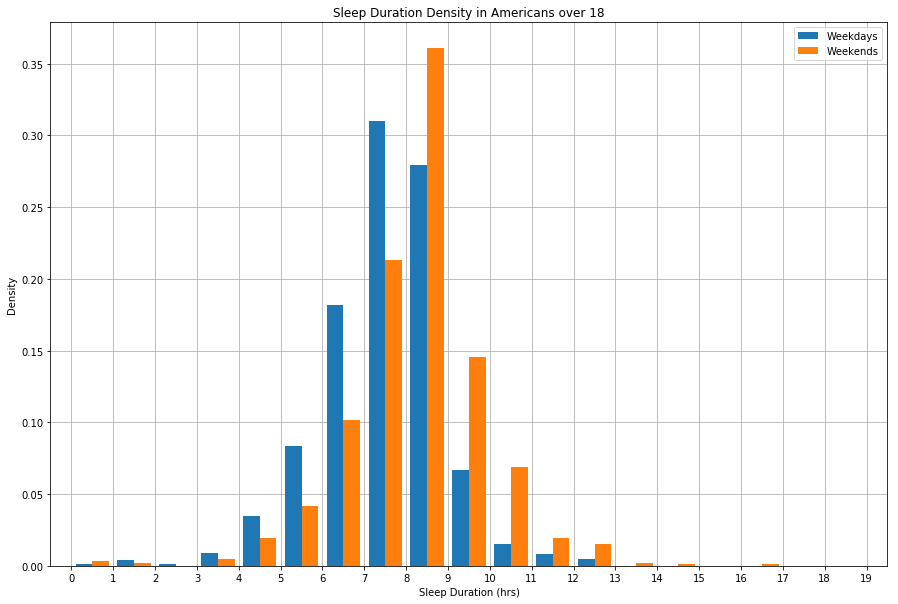

In [173]:
# Use my slow-cooked and spicy histogram function.
tanner_flavored_histogram([dfSleep["Weekday_sleep_hrs"], dfSleep["Weekend_sleep_hrs"]], 0, 20, 1, density=True, fwidth=0.8, \
                          legend_labels=("Weekdays","Weekends"), xlabel='Sleep Duration (hrs)', ylabel='Density',  \
                          title='Sleep Duration Density in Americans over 18', tick_skip=1, dtype='int')

Simple observation of the histogram seems to indicate that Americans get more sleep on the weekends (the orange distribution is shifted right from the blue histogram). Additionally, we see that both distributions are approximately symmetric and normally shaped. Now, it must be asked if the right shift significant? To answer that, more information is needed. Next, the mean and variance of each distribution is calculated.

In [175]:
weekday_mean = np.mean(dfSleep["Weekday_sleep_hrs"])
weekend_mean = np.mean(dfSleep["Weekend_sleep_hrs"])

weekday_var = np.var(dfSleep["Weekday_sleep_hrs"], ddof=1)
weekend_var = np.var(dfSleep["Weekend_sleep_hrs"], ddof=1)

print("Weekday mean sleep duration: {0:0.3f}; Weekday sleep duration variance: {1:0.3f}".format(weekday_mean, weekday_var))
print("Weekend mean sleep duration: {0:0.3f}; Weekend sleep duration variance: {1:0.3f}".format(weekend_mean, weekend_var))

Weekday mean sleep duration: 6.992; Weekday sleep duration variance: 2.138
Weekend mean sleep duration: 7.744; Weekend sleep duration variance: 2.655


Again, we see that the mean sleep duration is higher on the weekends by about 0.75 hours. Knowing the mean and variance for a large sample lends itself nicely to performing a Z-test to verify the original hypothesis, which will be explored in Part D.

---

**Part D:** Answer your research question proposed in Part A by carrying out at least one of the following.
* confidence interval test
* hypothesis test
* linear regression (single or multivariate), including inference for coefficients

Write a few sentences to summarize your findings. Include one sentence that clearly states your conclusion.

To answer the question of whether Americans over age 18 get more sleep on weekends, a confidence interval test and hypothesis test will be performed, both at the $\alpha=0.05$ significance level. In these cases, the null hypothesis is that there is no difference in the amount of sleep Americans over 18 get on the weekends, while the alternative hypothesis is that the is a difference in the amount of sleep American over 18 get on the weekdays and the weekends. The confidence interval test is performed first. To do this test, I borrow the `ci_mean` method from homework five.

In [177]:
def ci_mean(x, y=None, sx=None, sy=None, alp=0.05):
    xbar = np.mean(x)
    n = np.shape(x)[0]
    var = xbar
    
    xvar = 0
    if sx is not None:
        xvar = sx
    else:
        xvar = np.var(x, ddof=1)
    
    z = stats.norm.ppf(1-alp/2)
    
    scale = 0
    if y is not None:
        ybar = np.mean(y)
        m = np.shape(y)[0]
        yvar = 0
        if sy is not None:
            yvar = sy
        else:
            yvar = np.var(y, ddof=1)
        
        var = abs(xbar-ybar)
        scale = z*np.sqrt(xvar/n + yvar/m)
    else:
        scale = z*np.sqrt(xvar/n)
        
    return (var - scale, var + scale)


# Get the confidence intervals for both data sets individually.
ci_weekday = ci_mean(dfSleep["Weekday_sleep_hrs"])
print("Weekday CI: ({0:0.3f}, {1:0.3f})".format(ci_weekday[0], ci_weekday[1]))
ci_weekend = ci_mean(dfSleep["Weekend_sleep_hrs"])
print("Weekend CI: ({0:0.3f}, {1:0.3f})".format(ci_weekend[0], ci_weekend[1]))

Weekday CI: (6.901, 7.083)
Weekend CI: (7.642, 7.846)


The initial confidence interval test indicates that the mean sleep duration on weekdays and weekend is different because the 95% confidence intervals do not overlap. To verify this result, an additional confidence interval test will be carried out that tests the difference between the two means.

In [178]:
ci_diff= ci_mean(dfSleep["Weekday_sleep_hrs"], y=dfSleep["Weekend_sleep_hrs"])
print("CI for mean sleep difference: ({0:0.3f}, {1:0.3f})".format(ci_diff[0], ci_diff[1]))

CI for mean sleep difference: (0.615, 0.889)


The 95% confidence interval for the difference between the two means does not include zero, lending additional evidence to reject the null hypothesis. However, one more test will be conducted just to be sure: a two-tailed Z-test for the difference between the means with $\alpha=0.05$.

In [179]:
alpha = 0.05
n = len(dfSleep)
z = ((weekday_mean - weekend_mean) - 0)/np.sqrt(weekday_var/n + weekend_var/n)
z_crit = stats.norm.ppf(alpha/2)
print("Z={0:0.4f}, Z_crit={1:0.4f}, therefore do we reject the null hypothesis? {2}".format(z, z_crit, abs(z)>abs(z_crit)))

Z=-10.7755, Z_crit=-1.9600, therefore do we reject the null hypothesis? True


Again, it is shown that the null hypothesis should be rejected because the Z-value that is obtained from this data is more extreme than the critical Z value at the $\alpha=0.05$ significance level.

Due to both confidence interval tests and the Z test pointing to reject the null hypothesis, I conclude that Americans over age 18 do get a different amount of sleep per day over the weekend than over the weekdays.

<br>

---
[Back to Problem 3](#p3)

<a id='footnote'></a> Yeah yeah - fresh water versus salt water - I know, I know. But sharknadoes also are not real, so...

*that's just what the government wants us to think*